In [1]:
import numpy as np
import pandas as pd

**Importing dataset**

In [2]:
import pandas as pd
df = pd.read_csv('titanic.csv')
print(df.shape)

(891, 12)


In [3]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


**Drop Unnecessary Columns**

In [4]:
df=df.drop(['Name','Ticket','Cabin'],axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


**Visualize Data**

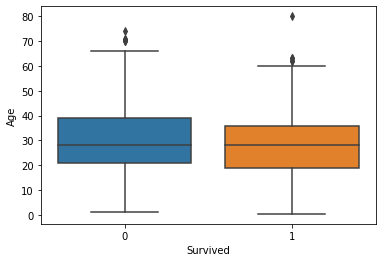

In [7]:
import seaborn as sn
sn.boxplot(x='Survived',y='Age', data=df)

**Missing Value Finding**

In [8]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


**Outlier Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


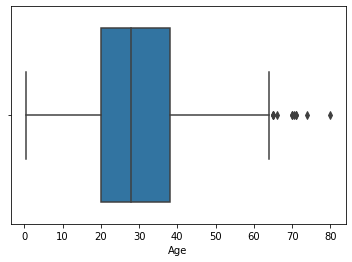

In [9]:
import seaborn as sn
sn.boxplot(df.Age) 

**Missing Value Handling**

In [10]:
m= df["Age"].mode()[0]
print(m)
df["Age"].fillna(m, inplace = True)
print(df.head(20))

24.0
    PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0             1         0       3    male  22.0      1      0   7.2500   
1             2         1       1  female  38.0      1      0  71.2833   
2             3         1       3  female  26.0      0      0   7.9250   
3             4         1       1  female  35.0      1      0  53.1000   
4             5         0       3    male  35.0      0      0   8.0500   
5             6         0       3    male  24.0      0      0   8.4583   
6             7         0       1    male  54.0      0      0  51.8625   
7             8         0       3    male   2.0      3      1  21.0750   
8             9         1       3  female  27.0      0      2  11.1333   
9            10         1       2  female  14.0      1      0  30.0708   
10           11         1       3  female   4.0      1      1  16.7000   
11           12         1       1  female  58.0      0      0  26.5500   
12           13         0       3

**Outlier Handling**

In [11]:
threshold=2   
outliers=[]# 1:68%,2:96%,3: 99.95%, >3 = Outlier
mean = np.mean(df.Age)
std =np.std(df.Age)
i=0
print('Outlier')
for x in df.Age:
    z_score= (x - mean)/std 
    if np.abs(z_score) > threshold:
        outliers.append(x)
        print(outliers[i])
        df['Age']=df['Age'].replace([outliers[i]], [m])
        i=i+1
           
print('Removing Outliers with mode=',m) 
print(df.head(20))

Outlier
2.0
58.0
55.0
66.0
65.0
0.83
59.0
71.0
70.5
55.5
1.0
61.0
56.0
62.0
63.0
0.92
60.0
64.0
0.75
57.0
80.0
70.0
0.67
0.42
74.0
Removing Outliers with mode= 24.0
    PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0             1         0       3    male  22.0      1      0   7.2500   
1             2         1       1  female  38.0      1      0  71.2833   
2             3         1       3  female  26.0      0      0   7.9250   
3             4         1       1  female  35.0      1      0  53.1000   
4             5         0       3    male  35.0      0      0   8.0500   
5             6         0       3    male  24.0      0      0   8.4583   
6             7         0       1    male  54.0      0      0  51.8625   
7             8         0       3    male  24.0      3      1  21.0750   
8             9         1       3  female  27.0      0      2  11.1333   
9            10         1       2  female  14.0      1      0  30.0708   
10           11      

**Applying Label Encoding**

In [12]:
from sklearn import preprocessing

In [13]:
le = preprocessing.LabelEncoder()
df.Embarked= le.fit_transform(df.Embarked)
df.Sex= le.fit_transform(df.Sex)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,24.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [14]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


 **Train-Test-Spliting**

In [15]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Standardization**

In [17]:
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()

In [18]:
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)
print(X_train)
print(X_test)

[[-0.45306593 -1.61413602  0.7243102  ... -0.47934164 -0.07868358
   0.55744438]
 [ 1.11387354 -0.40055118  0.7243102  ... -0.47934164 -0.37714494
   0.55744438]
 [-0.25427511  0.81303367  0.7243102  ... -0.47934164 -0.47486697
   0.55744438]
 ...
 [ 1.60890168  0.81303367  0.7243102  ... -0.47934164 -0.35580399
   0.55744438]
 [-0.04768856 -1.61413602 -1.38062393 ...  2.04874166  1.68320121
   0.55744438]
 [-1.34567573 -1.61413602  0.7243102  ...  0.78470001  0.86074761
   0.55744438]]
[[ 1.05110212  0.88742288  0.79200551 ...  0.70743435 -0.39246824
  -1.6733638 ]
 [ 0.01112494 -0.25537349  0.79200551 ... -0.45431563 -0.51311176
   0.67590773]
 [ 1.55568365  0.88742288  0.79200551 ... -0.45431563 -0.57857112
   0.67590773]
 ...
 [-1.58350675  0.88742288 -1.26261748 ...  5.35443427  0.01787172
   0.67590773]
 [-1.35625248 -0.25537349 -1.26261748 ... -0.45431563 -0.51311176
   0.67590773]
 [-1.64128326  0.88742288 -1.26261748 ...  0.70743435 -0.35550086
   0.67590773]]


**RandomForestClassifier Model**

In [54]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0])

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
confusion_matrix(y_pred,y_test)

Accuracy: 0.776536312849162
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.75      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



array([[88, 23],
       [17, 51]])

**Applying PCA**

In [21]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [22]:
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [23]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
confusion_matrix(y_pred,y_test)

Accuracy: 0.6759776536312849
              precision    recall  f1-score   support

           0       0.69      0.81      0.75       105
           1       0.64      0.49      0.55        74

    accuracy                           0.68       179
   macro avg       0.67      0.65      0.65       179
weighted avg       0.67      0.68      0.67       179



array([[85, 38],
       [20, 36]])

**LogisticRegression Model**

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
confusion_matrix(y_pred,y_test)

Accuracy: 0.7262569832402235
              precision    recall  f1-score   support

           0       0.71      0.90      0.79       105
           1       0.78      0.47      0.59        74

    accuracy                           0.73       179
   macro avg       0.74      0.69      0.69       179
weighted avg       0.74      0.73      0.71       179



array([[95, 39],
       [10, 35]])

In [28]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [29]:
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [30]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
confusion_matrix(y_pred,y_test)

Accuracy: 0.7262569832402235
              precision    recall  f1-score   support

           0       0.71      0.90      0.79       105
           1       0.78      0.47      0.59        74

    accuracy                           0.73       179
   macro avg       0.74      0.69      0.69       179
weighted avg       0.74      0.73      0.71       179



array([[95, 39],
       [10, 35]])

**SVC Model**

In [ ]:
model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
confusion_matrix(y_pred,y_test)

Accuracy: 0.7150837988826816
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       105
           1       0.71      0.53      0.60        74

    accuracy                           0.72       179
   macro avg       0.71      0.69      0.69       179
weighted avg       0.71      0.72      0.71       179



array([[89, 35],
       [16, 39]])

In [34]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [35]:
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [36]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
confusion_matrix(y_pred,y_test)

Accuracy: 0.7150837988826816
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       105
           1       0.71      0.53      0.60        74

    accuracy                           0.72       179
   macro avg       0.71      0.69      0.69       179
weighted avg       0.71      0.72      0.71       179



array([[89, 35],
       [16, 39]])

**DecisionTreeClassifier Model**

In [38]:
from sklearn import tree

In [39]:
model=tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
confusion_matrix(y_pred,y_test)

Accuracy: 0.6312849162011173
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       105
           1       0.56      0.47      0.51        74

    accuracy                           0.63       179
   macro avg       0.62      0.61      0.61       179
weighted avg       0.62      0.63      0.62       179



array([[78, 39],
       [27, 35]])

In [42]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [43]:
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [44]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
confusion_matrix(y_pred,y_test)

Accuracy: 0.6424581005586593
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       105
           1       0.58      0.49      0.53        74

    accuracy                           0.64       179
   macro avg       0.63      0.62      0.62       179
weighted avg       0.64      0.64      0.64       179



array([[79, 38],
       [26, 36]])

**GaussianNB Model**

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
model=GaussianNB()

In [ ]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
confusion_matrix(y_pred,y_test)

Accuracy: 0.7262569832402235
              precision    recall  f1-score   support

           0       0.70      0.94      0.80       105
           1       0.84      0.42      0.56        74

    accuracy                           0.73       179
   macro avg       0.77      0.68      0.68       179
weighted avg       0.76      0.73      0.70       179



array([[99, 43],
       [ 6, 31]])

In [50]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [51]:
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [52]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
confusion_matrix(y_pred,y_test)

Accuracy: 0.7262569832402235
              precision    recall  f1-score   support

           0       0.70      0.94      0.80       105
           1       0.84      0.42      0.56        74

    accuracy                           0.73       179
   macro avg       0.77      0.68      0.68       179
weighted avg       0.76      0.73      0.70       179



array([[99, 43],
       [ 6, 31]])